# NOTES

In [2]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots

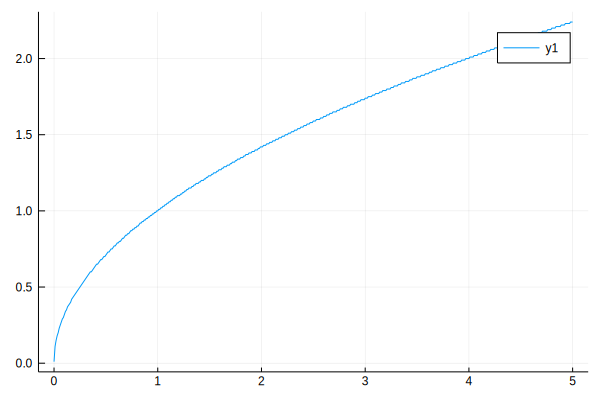

In [2]:
function inv_dist(F, x, d)
    Δ = 0
    while true
        if x < F(Δ)
            return Δ
        end
        Δ += d
    end
end

f(x) = x^2

xs = 0:0.01:5
plot(xs, inv_dist.(f, xs, 0.01))

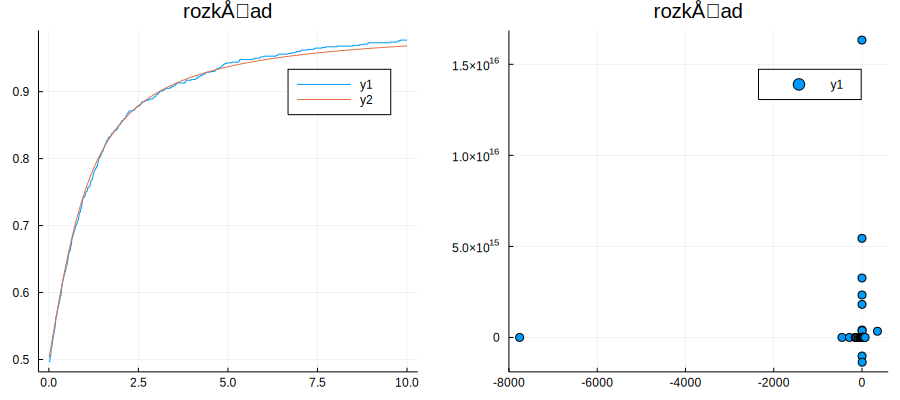

In [3]:
μ = 0
σ = 1

U = rand(Uniform(-π/2, π/2), 1000)
#X = quantile.(Cauchy(0, 1), U)
X = σ .* tan.(U) .+ μ
xs = 0.01:0.01:10
F = ecdf(X)

plot(xs, F.(xs))
plt1 = plot!(xs, cdf.(Cauchy(μ, σ), xs))

#plt2 = histogram(X, normed=true, bins=30)
#plt2 = plot!(xs, pdf.(Cauchy(μ, σ), xs), linewidth=2.5, color="red")
plt2 = scatter(sort(X), quantile.(Cauchy(0, 1), xs))

plot(plt1, plt2, layout=(1, 2), size=(900, 400), title="rozkład")

# MySpace

In [1]:
using Plots

using Distributions
using LinearAlgebra

## Akceptacji-Odrzucenia

In [2]:
n=1e7

1.0e7

In [3]:
f(x)=0<= x <= pi/2 ? sin(x)*2^cos(x)*log(2) : nothing

f (generic function with 1 method)

In [4]:
g(x)= 0<= x <= pi/2 ? 2/pi : nothing

g (generic function with 1 method)

In [5]:
h(x, c)= g(x)/c/f(x)

h (generic function with 1 method)

In [6]:
h(x)=sin(x)*2^cos(x)*2*pi/5

h (generic function with 2 methods)

In [7]:
k()=begin
U=rand()
Y=pi/2*rand()
    while h(Y,5/4)>U
        #println(h(Y,1.25),"   ",Y)
        U=rand()
        Y=pi/2*rand()
    end
    return Y
end

k (generic function with 1 method)

In [22]:
k2()=begin
U=rand()
Y=pi/2*rand()
    while f(Y)/g(Y)/(5/4)>U
        #println(h(Y,1.25),"   ",Y)
        U=rand()
        Y=pi/2*rand()
    end
    return Y
end

k2 (generic function with 1 method)

In [60]:
Z(c=5/4)=begin
    while true
        y=pi/2*rand()
        u=rand()
        
        u<f(y)/c/g(y) ? (return y) : 0
        #u<f(y)*2*pi/5 ? (return y) : 0
        #if u<=f(y)/c/g(y)
        #    return [y,i]
        #end
    end
end

Z (generic function with 2 methods)

In [101]:
n=1e6

1.0e6

In [102]:
a=[Z(5/4/log(2)) for i in 1:n];

In [11]:
#h(x)=f(x)*2*pi/5

h (generic function with 2 methods)

In [12]:
a=[k() for i in 1:n];

In [56]:
a=[Z() for i in 1:n];

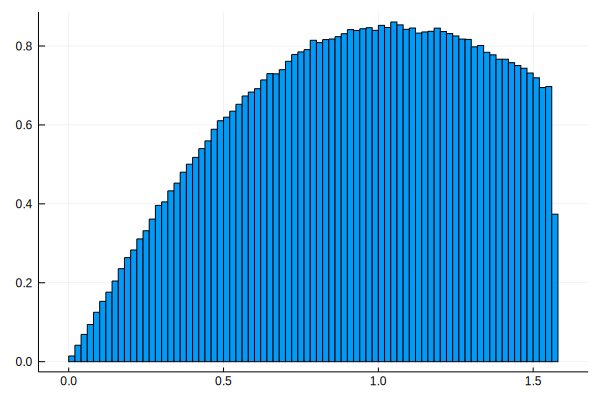

In [103]:
histogram(a,normed=true, leg=false)

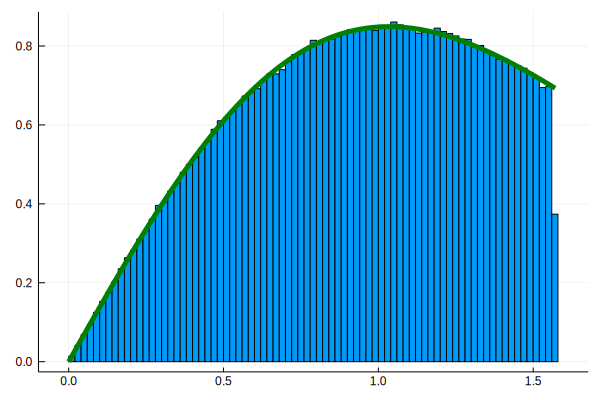

In [104]:
plot!(x->f(x), LinRange(0,pi/2,100), linewidth=5, color=:green)

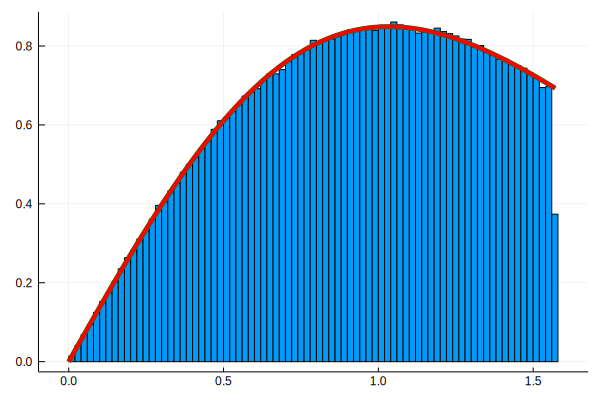

In [105]:
plot!(x->f(x), LinRange(0,pi/2,100), linewidth=4, color=:red)

In [64]:
l(x)=sum(a.<x)/n

l (generic function with 1 method)

In [83]:
l(0.2)

0.02639

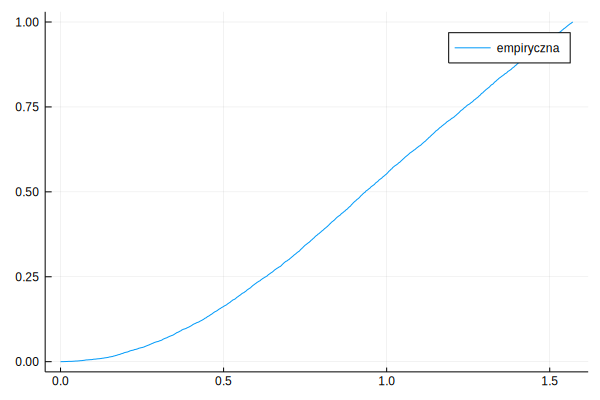

In [90]:
plot(x->l(x), LinRange(0,pi/2,Int(1e3)), label="empiryczna")

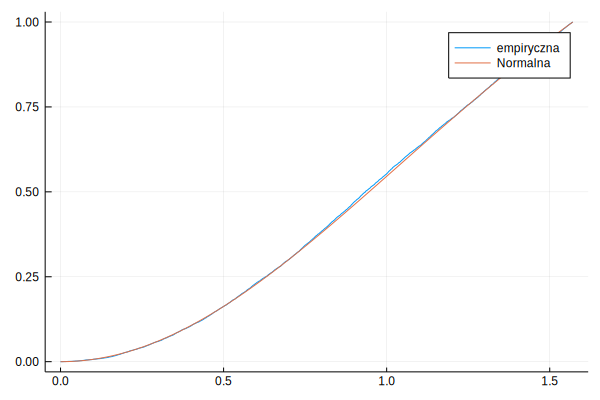

In [91]:
plot!(x->(2-2^cos(x)), LinRange(0,pi/2, 1000), label="Normalna")

In [139]:
savefig(plot!(),"fig/fig_AO_con.png")

# Rozkład normaly

## Boxa-Mulera

## Biegunowa